We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
df = pd.read_csv("data/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [23]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

X_scaled = sx.fit_transform(df.iloc[:,:-1])
Y_scaled = sy.fit_transform(df.iloc[:, -1].values.reshape(df.shape[0], 1))

In [24]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [25]:
Y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [26]:
Y_scaled = Y_scaled.flatten()

In [30]:
Y_scaled

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

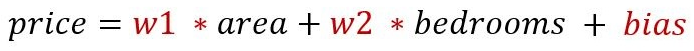

Now is the time to implement batch gradient descent.

In [87]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    w = np.ones(X.shape[1])
    bias = 1
    cost_function_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + bias

        w_grad = -(2/X.shape[0])*np.dot(X.T, (y_true - y_predicted))
        bias_grad = -(2/X.shape[0])*np.sum(y_true - y_predicted)

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*bias_grad
        cost = np.mean(np.square(y_true - y_predicted))
        if i%10 == 0:
            cost_function_list.append(cost)
            epoch_list.append(i)
    return w, bias, cost, cost_function_list, epoch_list  


In [88]:
w, bias, cost, cost_function_list, epoch_list = batch_gradient_descent(X_scaled, Y_scaled, 500)
w, bias, cost

(array([0.65505447, 0.47204276]), -0.10562284482412325, 0.004176627563634606)

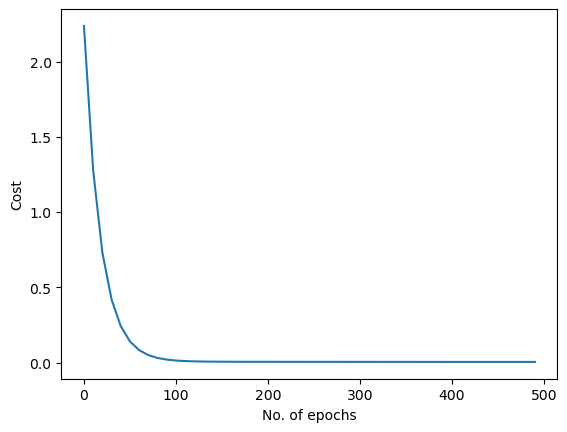

In [89]:
plt.xlabel("No. of epochs")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_function_list)

Lets do some predictions now.

In [90]:
def predict_using_bgd(area, bedrooms, w, bias):
    input_scaled = sx.transform(np.array([[area, bedrooms]]))[0]
    output_scaled = w[0]*input_scaled[0] + w[1]*input_scaled[1] + bias
    output = sy.inverse_transform([[output_scaled]])
    return output[0][0]

In [91]:
predict_using_bgd(1500, 3, w, bias)

C:\Users\sujoy\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


70.94954283313693

In [47]:
w = np.ones(X_scaled.shape[1])
np.dot(w, X_scaled.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [51]:
X_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [49]:
np.dot(X_scaled.T, np.dot(w, X_scaled.T))

array([ 8.736861  , 10.19172414])

In [52]:
np.dot(np.dot(w, X_scaled.T), X_scaled)

array([ 8.736861  , 10.19172414])

(2) Stochastic Gradient Descent Implementation

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights


In [113]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    w = np.ones(X.shape[1])
    bias = 1
    cost_function_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0, X.shape[0] - 1)
        X_sample = X[random_index]
        y_true_sample = y_true[random_index]
        
        y_predicted_sample = np.dot(w, X_sample.T) + bias

        w_grad = -(2/X_sample.shape[0])*np.dot(X_sample.T, (y_true_sample - y_predicted_sample))
        bias_grad = -(2/X_sample.shape[0])*np.sum(y_true_sample - y_predicted_sample)

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*bias_grad
        cost = np.mean(np.square(y_true_sample - y_predicted_sample))
        if i%10 == 0:
            cost_function_list.append(cost)
            epoch_list.append(i)
    return w, bias, cost, cost_function_list, epoch_list  

In [114]:
w_sgd, bias_sgd, cost_sgd, cost_function_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled, Y_scaled, 500)
w_sgd, bias_sgd, cost_sgd

(array([0.6260958 , 0.46624795]), -0.09241212845541293, 0.0036284264136458313)

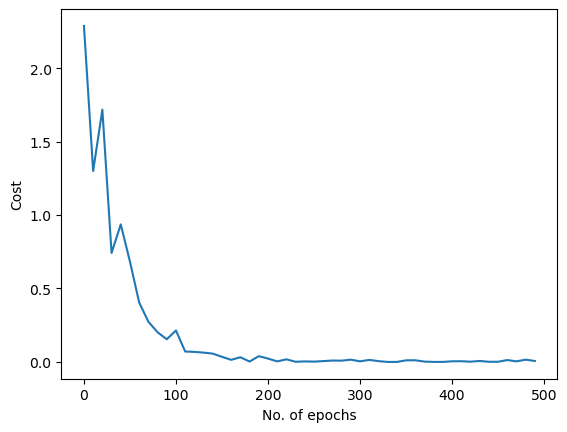

In [115]:
plt.xlabel("No. of epochs")
plt.ylabel("Cost")
plt.plot(epoch_list_sgd, cost_function_list_sgd)

In [97]:
def predict_using_sgd(area, bedrooms, w, bias):
    input_scaled = sx.transform(np.array([[area, bedrooms]]))[0]
    output_scaled = w[0]*input_scaled[0] + w[1]*input_scaled[1] + bias
    output = sy.inverse_transform([[output_scaled]])
    return output[0][0]

In [99]:
predict_using_sgd(1500, 3, w_sgd, bias_sgd)

C:\Users\sujoy\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


72.79415993189508

(3) Mini-batch Gradient Descent Implementation
Mini-batchic GD will use randomly pickeset ofle training sampsle to calculate error and using this error we backpropage to adjust weights

In [111]:
def mini_batch_gradient_descent(X, y_true, epochs, num_samples, learning_rate=0.01):
    w = np.ones(X.shape[1])
    bias = 1
    cost_function_list = []
    epoch_list = []
    for i in range(epochs):
        try:
            random_range = random.sample(range(0, X.shape[0]), num_samples)
        except ValueError:
            print('Sample size exceeded population size.')
        X_sample = X[random_range]
        y_true_sample = y_true[random_range]
        
        y_predicted_sample = np.dot(w, X_sample.T) + bias

        w_grad = -(2/X_sample.shape[0])*np.dot(X_sample.T, (y_true_sample - y_predicted_sample))
        bias_grad = -(2/X_sample.shape[0])*np.sum(y_true_sample - y_predicted_sample)

        w = w - learning_rate*w_grad
        bias = bias - learning_rate*bias_grad
        cost = np.mean(np.square(y_true_sample - y_predicted_sample))
        if i%10 == 0:
            cost_function_list.append(cost)
            epoch_list.append(i)
    return w, bias, cost, cost_function_list, epoch_list  

In [112]:
w_mbgd, bias_mbgd, cost_mbgd, cost_function_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(X_scaled, Y_scaled, epochs=500, num_samples=5)
w_mbgd, bias_mbgd, cost_mbgd

(array([0.65252973, 0.47041932]), -0.10702700065205913, 0.0029211422291099756)

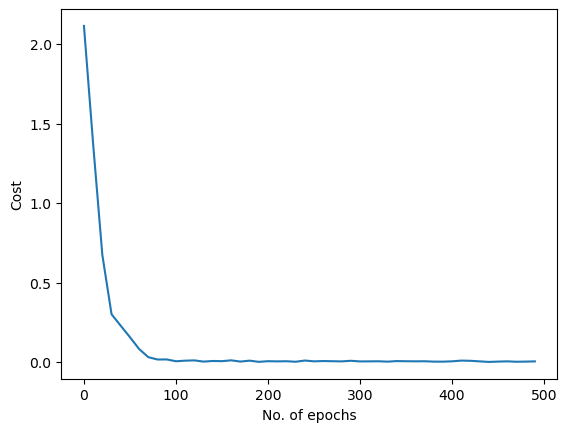

In [116]:
plt.xlabel("No. of epochs")
plt.ylabel("Cost")
plt.plot(epoch_list_mbgd, cost_function_list_mbgd)

In [117]:
def predict_using_mbgd(area, bedrooms, w, bias):
    input_scaled = sx.transform(np.array([[area, bedrooms]]))[0]
    output_scaled = w[0]*input_scaled[0] + w[1]*input_scaled[1] + bias
    output = sy.inverse_transform([[output_scaled]])
    return output[0][0]

In [118]:
predict_using_mbgd(1500, 3, w_mbgd, bias_mbgd)

C:\Users\sujoy\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


70.56812756967174